# SQL Data Science Project - Visualizations

This notebook connects to PostgreSQL, loads SQL views, and creates data science visualizations.


## 1. Setup & Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from psycopg2 import sql

# Set seaborn theme
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Database connection function
def run_sql(query):
    """Execute SQL query and return DataFrame"""
    conn = psycopg2.connect(
        dbname="retail_db",
        user="postgres",
        password="Ruchit11",  # Replace with your password
        host="localhost",
        port="5432"
    )
    df = pd.read_sql(query, conn)
    conn.close()
    return df

# Create connection for multiple queries
connection = psycopg2.connect(
    dbname="retail_db",
    user="postgres",
    password="Ruchit11",  # Replace with your password
    host="localhost",
    port="5432"
)

print("Setup complete!")


Setup complete!


## 2. Load SQL Views Into DataFrames


In [ ]:
# Load all views
category_perf = pd.read_sql("SELECT * FROM category_performance;", connection)
store_perf = pd.read_sql("SELECT * FROM store_performance;", connection)
top_sellers = pd.read_sql("SELECT * FROM top_sellers;", connection)
top_revenue = pd.read_sql("SELECT * FROM top_revenue_products;", connection)
cluster_sum = pd.read_sql("SELECT * FROM cluster_summary;", connection)
stock_risk = pd.read_sql("SELECT * FROM stock_risk_dashboard;", connection)
revenue_curve = pd.read_sql("SELECT * FROM revenue_curve;", connection)
perf_ranked = pd.read_sql("SELECT * FROM performance_ranked;", connection)

print("All views loaded successfully!")
print(f"Category Performance: {len(category_perf)} rows")
print(f"Store Performance: {len(store_perf)} rows")
print(f"Top Sellers: {len(top_sellers)} rows")
print(f"Top Revenue: {len(top_revenue)} rows")


C:\Users\14122\AppData\Local\Temp\ipykernel_27020\3465473134.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_perf = pd.read_sql("SELECT * FROM category_performance;", connection)
C:\Users\14122\AppData\Local\Temp\ipykernel_27020\3465473134.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  store_perf = pd.read_sql("SELECT * FROM store_performance;", connection)
C:\Users\14122\AppData\Local\Temp\ipykernel_27020\3465473134.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_sellers = pd.read_sql("SELECT * FR

All views loaded successfully!
Category Performance: 5 rows
Store Performance: 5 rows
Top Sellers: 20 rows
Top Revenue: 20 rows


## Visualization 1: Category Performance - Which Categories Drive Revenue?

**Business Question:** Which product categories are the biggest revenue drivers, and how do they compare?


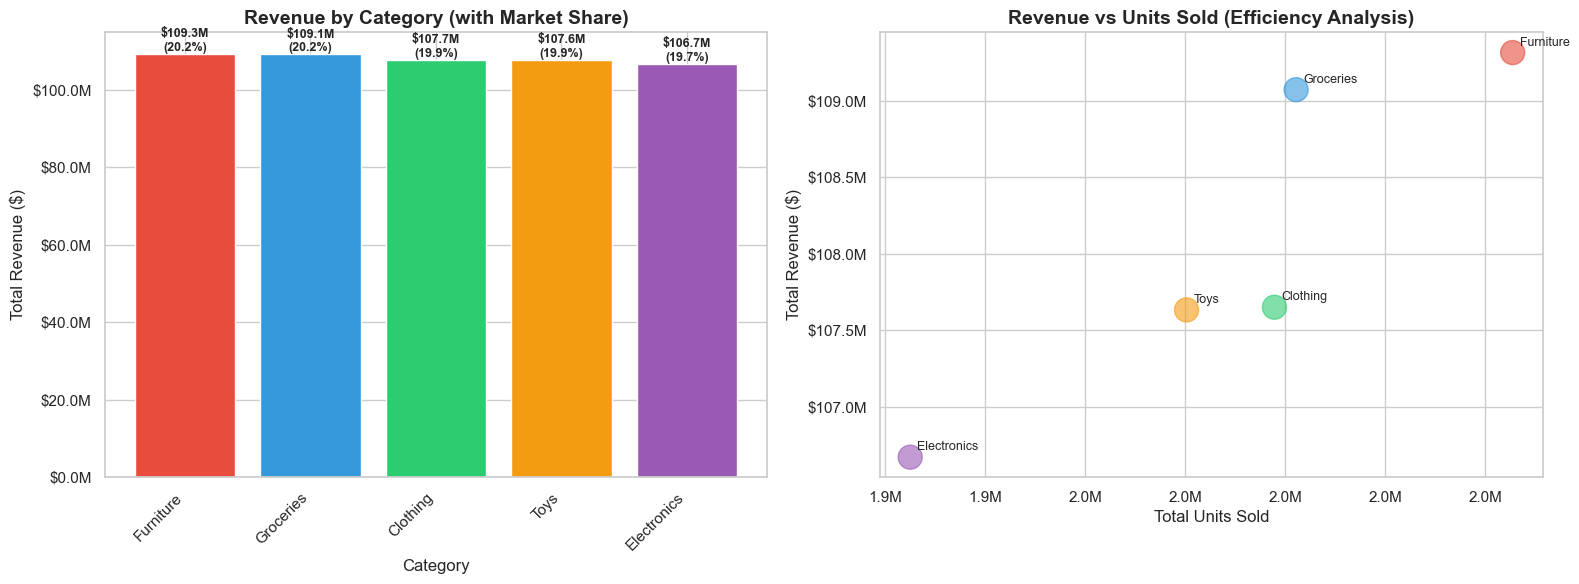


KEY INSIGHTS:
🏆 Top Revenue Category: Furniture ($109.32M)
📊 Market Share Leader: Furniture (20.2% of total revenue)
💰 Average Revenue per Category: $108.07M
📈 Revenue Range: $106.67M - $109.32M


In [ ]:
# Get category data and calculate insights
category_sorted = category_perf.sort_values('total_revenue', ascending=False)

# Calculate market share
total_revenue_all = category_sorted['total_revenue'].sum()
category_sorted = category_sorted.copy()
category_sorted['market_share_pct'] = (category_sorted['total_revenue'] / total_revenue_all) * 100

# Create a comprehensive view
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Revenue with market share
ax1 = axes[0]
bars = ax1.bar(category_sorted['category'], category_sorted['total_revenue'],
               color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6'])

ax1.set_title('Revenue by Category (with Market Share)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Total Revenue ($)', fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value and market share labels
for i, (cat, rev, share) in enumerate(zip(category_sorted['category'], 
                                          category_sorted['total_revenue'],
                                          category_sorted['market_share_pct'])):
    ax1.text(i, rev, f'${rev/1e6:.1f}M\n({share:.1f}%)', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Chart 2: Revenue vs Units Sold (shows efficiency)
ax2 = axes[1]
scatter = ax2.scatter(category_sorted['total_units_sold'], category_sorted['total_revenue'],
                     s=300, alpha=0.6, c=['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6'])

ax2.set_title('Revenue vs Units Sold (Efficiency Analysis)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Units Sold', fontsize=12)
ax2.set_ylabel('Total Revenue ($)', fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Add category labels
for i, cat in enumerate(category_sorted['category']):
    ax2.annotate(cat, 
                (category_sorted.iloc[i]['total_units_sold'], 
                 category_sorted.iloc[i]['total_revenue']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print(f"🏆 Top Revenue Category: {category_sorted.iloc[0]['category']} (${category_sorted.iloc[0]['total_revenue']/1e6:.2f}M)")
print(f"📊 Market Share Leader: {category_sorted.iloc[0]['category']} ({category_sorted.iloc[0]['market_share_pct']:.1f}% of total revenue)")
print(f"💰 Average Revenue per Category: ${category_sorted['total_revenue'].mean()/1e6:.2f}M")
print(f"📈 Revenue Range: ${category_sorted['total_revenue'].min()/1e6:.2f}M - ${category_sorted['total_revenue'].max()/1e6:.2f}M")
print("="*60)


## Visualization 2: Store Performance - Which Stores Need Attention?

**Business Question:** Which stores are underperforming? Which stores are most efficient?


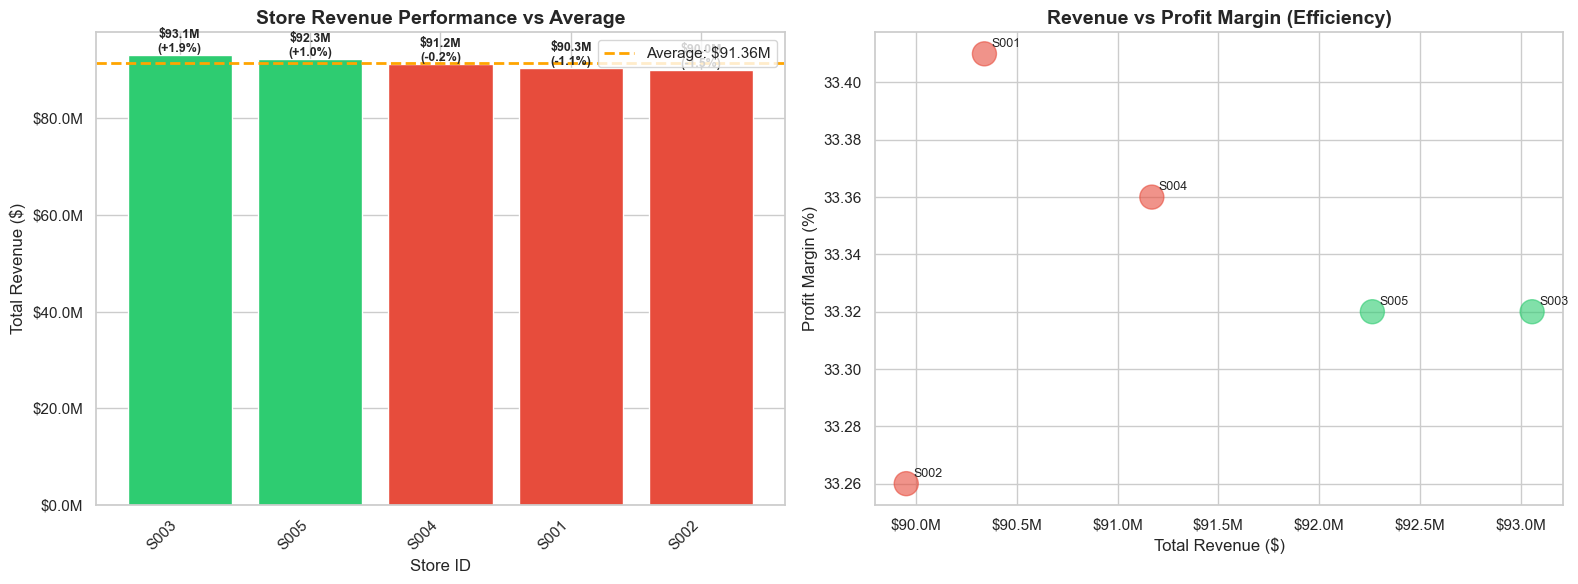


KEY INSIGHTS:
🏆 Top Performer: S003 ($93.06M, +1.9% vs avg)
⚠️  Needs Attention: S002 ($89.95M, -1.5% vs avg)
📊 Average Store Revenue: $91.36M
💡 Action: Investigate why S002 is underperforming


In [ ]:
# Get store data
store_col = store_perf.columns[0]  # First column is store identifier
store_sorted = store_perf.sort_values('total_revenue', ascending=False).copy()

# Calculate performance metrics
avg_revenue = store_sorted['total_revenue'].mean()
store_sorted['vs_avg_pct'] = ((store_sorted['total_revenue'] - avg_revenue) / avg_revenue) * 100

# Create comprehensive analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Revenue Performance (with benchmark)
ax1 = axes[0]
colors = ['#2ecc71' if x >= avg_revenue else '#e74c3c' for x in store_sorted['total_revenue']]
bars = ax1.bar(store_sorted[store_col], store_sorted['total_revenue'], color=colors)

# Add average line
ax1.axhline(y=avg_revenue, color='orange', linestyle='--', linewidth=2, label=f'Average: ${avg_revenue/1e6:.2f}M')

ax1.set_title('Store Revenue Performance vs Average', fontsize=14, fontweight='bold')
ax1.set_xlabel('Store ID', fontsize=12)
ax1.set_ylabel('Total Revenue ($)', fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax1.legend()
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add labels
for i, (store, rev, pct) in enumerate(zip(store_sorted[store_col], 
                                          store_sorted['total_revenue'],
                                          store_sorted['vs_avg_pct'])):
    ax1.text(i, rev, f'${rev/1e6:.1f}M\n({pct:+.1f}%)', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Chart 2: Revenue vs Profit Margin (efficiency)
if 'profit_margin_pct' in store_sorted.columns:
    ax2 = axes[1]
    scatter = ax2.scatter(store_sorted['total_revenue'], store_sorted['profit_margin_pct'],
                         s=300, alpha=0.6, c=colors)
    
    ax2.set_title('Revenue vs Profit Margin (Efficiency)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Total Revenue ($)', fontsize=12)
    ax2.set_ylabel('Profit Margin (%)', fontsize=12)
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    # Add store labels
    for i, store in enumerate(store_sorted[store_col]):
        ax2.annotate(store, 
                    (store_sorted.iloc[i]['total_revenue'], 
                     store_sorted.iloc[i]['profit_margin_pct']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
else:
    # Fallback: Revenue vs Units Sold
    ax2 = axes[1]
    scatter = ax2.scatter(store_sorted['total_units_sold'], store_sorted['total_revenue'],
                         s=300, alpha=0.6, c=colors)
    
    ax2.set_title('Revenue vs Units Sold (Efficiency)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Total Units Sold', fontsize=12)
    ax2.set_ylabel('Total Revenue ($)', fontsize=12)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
    
    for i, store in enumerate(store_sorted[store_col]):
        ax2.annotate(store, 
                    (store_sorted.iloc[i]['total_units_sold'], 
                     store_sorted.iloc[i]['total_revenue']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print actionable insights
print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
top_store = store_sorted.iloc[0]
bottom_store = store_sorted.iloc[-1]
print(f"🏆 Top Performer: {top_store[store_col]} (${top_store['total_revenue']/1e6:.2f}M, {top_store['vs_avg_pct']:+.1f}% vs avg)")
print(f"⚠️  Needs Attention: {bottom_store[store_col]} (${bottom_store['total_revenue']/1e6:.2f}M, {bottom_store['vs_avg_pct']:+.1f}% vs avg)")
print(f"📊 Average Store Revenue: ${avg_revenue/1e6:.2f}M")
print(f"💡 Action: Investigate why {bottom_store[store_col]} is underperforming")
print("="*60)


## Visualization 4: Product Performance - Price Elasticity & Top Performers

**Business Question:** What's the relationship between price and sales? Which products should we focus on?


C:\Users\14122\AppData\Local\Temp\ipykernel_27020\319064365.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_sellers_sample = pd.read_sql("SELECT price, units_sold, category FROM inventory WHERE price IS NOT NULL AND units_sold IS NOT NULL LIMIT 1000;", connection)
C:\Users\14122\AppData\Local\Temp\ipykernel_27020\319064365.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue_risk = pd.read_sql("SELECT revenue, stock_risk, category FROM inventory WHERE revenue IS NOT NULL AND stock_risk IS NOT NULL LIMIT 1000;", connection)


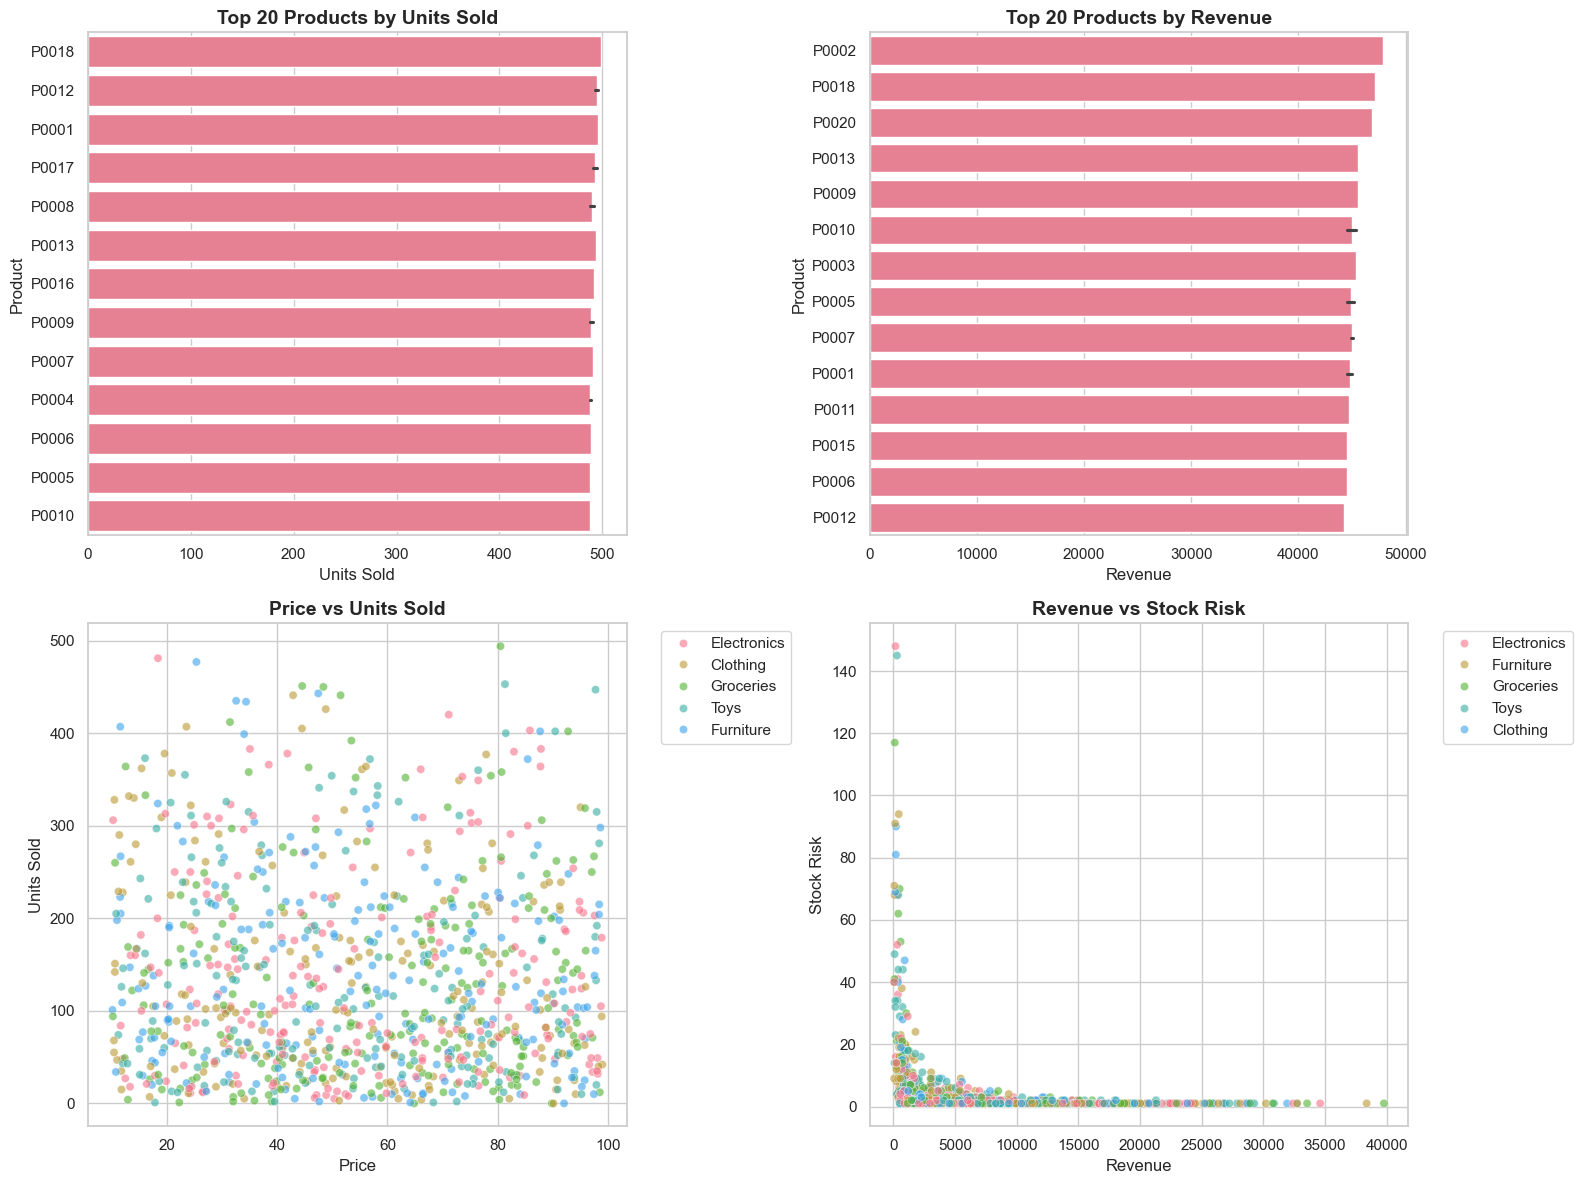

In [ ]:
# Get sample data for price elasticity analysis
price_data = pd.read_sql("""
    SELECT price, units_sold, category, revenue 
    FROM inventory 
    WHERE price IS NOT NULL AND units_sold IS NOT NULL 
    LIMIT 2000
""", connection)

# Top products analysis
top_sellers_sorted = top_sellers.sort_values('units_sold', ascending=True).head(15)
top_revenue_sorted = top_revenue.sort_values('revenue', ascending=True).head(15)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Top 15 by Units Sold
ax1 = axes[0, 0]
bars1 = ax1.barh(range(len(top_sellers_sorted)), top_sellers_sorted['units_sold'],
                 color='#3498db')
ax1.set_yticks(range(len(top_sellers_sorted)))
ax1.set_yticklabels(top_sellers_sorted['product_name'], fontsize=8)
ax1.set_title('Top 15 Products by Units Sold', fontsize=14, fontweight='bold')
ax1.set_xlabel('Units Sold', fontsize=12)
ax1.invert_yaxis()

# Add value labels
for i, val in enumerate(top_sellers_sorted['units_sold']):
    ax1.text(val, i, f' {int(val):,}', va='center', fontsize=8)

# Chart 2: Top 15 by Revenue
ax2 = axes[0, 1]
bars2 = ax2.barh(range(len(top_revenue_sorted)), top_revenue_sorted['revenue'],
                 color='#2ecc71')
ax2.set_yticks(range(len(top_revenue_sorted)))
ax2.set_yticklabels(top_revenue_sorted['product_name'], fontsize=8)
ax2.set_title('Top 15 Products by Revenue', fontsize=14, fontweight='bold')
ax2.set_xlabel('Revenue ($)', fontsize=12)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))
ax2.invert_yaxis()

# Add value labels
for i, val in enumerate(top_revenue_sorted['revenue']):
    ax2.text(val, i, f' ${val/1e3:.0f}K', va='center', fontsize=8)

# Chart 3: Price vs Units Sold (Price Elasticity)
ax3 = axes[1, 0]
scatter = ax3.scatter(price_data['price'], price_data['units_sold'], 
                     c=price_data['category'].astype('category').cat.codes,
                     alpha=0.5, cmap='tab10', s=30)
ax3.set_title('Price Elasticity: Price vs Units Sold', fontsize=14, fontweight='bold')
ax3.set_xlabel('Price ($)', fontsize=12)
ax3.set_ylabel('Units Sold', fontsize=12)
ax3.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(price_data['price'], price_data['units_sold'], 1)
p = np.poly1d(z)
ax3.plot(price_data['price'].sort_values(), p(price_data['price'].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label='Trend Line')
ax3.legend()

# Chart 4: Revenue vs Stock Risk (High Revenue, High Risk = Priority)
ax4 = axes[1, 1]
revenue_risk_data = pd.read_sql("""
    SELECT revenue, stock_risk, category, product_id
    FROM inventory 
    WHERE revenue IS NOT NULL AND stock_risk IS NOT NULL 
    LIMIT 2000
""", connection)

# Identify high-risk, high-revenue products (top right quadrant)
median_revenue = revenue_risk_data['revenue'].median()
median_risk = revenue_risk_data['stock_risk'].median()

scatter = ax4.scatter(revenue_risk_data['revenue'], revenue_risk_data['stock_risk'],
                     alpha=0.5, s=30, c='#9b59b6')
ax4.axvline(x=median_revenue, color='orange', linestyle='--', alpha=0.7, label='Median Revenue')
ax4.axhline(y=median_risk, color='orange', linestyle='--', alpha=0.7, label='Median Risk')
ax4.set_title('Revenue vs Stock Risk (Action Required: Top Right)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Revenue ($)', fontsize=12)
ax4.set_ylabel('Stock Risk', fontsize=12)
ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))
ax4.legend()
ax4.grid(True, alpha=0.3)

# Highlight high-risk, high-revenue products
high_risk_high_rev = revenue_risk_data[
    (revenue_risk_data['revenue'] > median_revenue) & 
    (revenue_risk_data['stock_risk'] > median_risk)
]
if len(high_risk_high_rev) > 0:
    ax4.scatter(high_risk_high_rev['revenue'], high_risk_high_rev['stock_risk'],
               s=100, c='red', alpha=0.8, marker='X', label='High Risk + High Revenue')

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print(f"🏆 Top Seller: {top_sellers_sorted.iloc[-1]['product_name']} ({int(top_sellers_sorted.iloc[-1]['units_sold']):,} units)")
print(f"💰 Top Revenue Generator: {top_revenue_sorted.iloc[-1]['product_name']} (${top_revenue_sorted.iloc[-1]['revenue']/1e3:.0f}K)")
print(f"⚠️  High-Risk Products: {len(high_risk_high_rev)} products with high revenue AND high stock risk need immediate attention")
print(f"💡 Price Elasticity: Trend shows relationship between price and demand")
print("="*60)


## Visualization 3: Cluster Analysis


In [ ]:
# First, check what we have
print("Cluster Summary columns:", cluster_sum.columns.tolist())
print("\nCluster Summary Data:")
print(cluster_sum)
print("\n")

# Check for NaN values
print("NaN check:")
print(cluster_sum.isna().sum())
print("\n")

# Sort by cluster number and drop any rows with NaN in key columns
cluster_sorted = cluster_sum.sort_values('cluster').copy()

# Create visualization 1: Number of products per cluster
if 'num_products' in cluster_sorted.columns and not cluster_sorted['num_products'].isna().all():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Filter out NaN values
    valid_data = cluster_sorted[cluster_sorted['num_products'].notna()]
    
    bars = ax.bar(valid_data['cluster'].astype(str), valid_data['num_products'],
                  color=['#2ecc71', '#3498db', '#9b59b6'][:len(valid_data)])
    
    ax.set_title('Number of Products per Cluster', fontsize=14, fontweight='bold')
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel('Number of Products', fontsize=12)
    
    # Add value labels
    for i, (cluster, val) in enumerate(zip(valid_data['cluster'], valid_data['num_products'])):
        ax.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No valid num_products data to plot")

# Create visualization 2: Average revenue per cluster
if 'avg_revenue' in cluster_sorted.columns and not cluster_sorted['avg_revenue'].isna().all():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Filter out NaN values
    valid_data = cluster_sorted[cluster_sorted['avg_revenue'].notna()]
    
    if len(valid_data) > 0:
        # Calculate y-axis range for zoom
        min_val = valid_data['avg_revenue'].min()
        max_val = valid_data['avg_revenue'].max()
        range_val = max_val - min_val
        
        if range_val > 0:
            y_min = min_val - (range_val * 0.2)
            y_max = max_val + (range_val * 0.2)
        else:
            y_min = min_val * 0.9 if min_val > 0 else min_val - abs(min_val) * 0.1
            y_max = max_val * 1.1 if max_val > 0 else max_val + abs(max_val) * 0.1
        
        bars = ax.bar(valid_data['cluster'].astype(str), valid_data['avg_revenue'],
                      color=['#2ecc71', '#3498db', '#9b59b6'][:len(valid_data)])
        
        ax.set_ylim(y_min, y_max)
        ax.set_title('Average Revenue per Cluster', fontsize=14, fontweight='bold')
        ax.set_xlabel('Cluster', fontsize=12)
        ax.set_ylabel('Average Revenue ($)', fontsize=12)
        
        # Format y-axis
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
        
        # Add value labels
        for i, (cluster, val) in enumerate(zip(valid_data['cluster'], valid_data['avg_revenue'])):
            ax.text(i, val, f'${val:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No valid avg_revenue data to plot")
else:
    print("No valid avg_revenue data to plot")


Cluster Summary columns: ['cluster', 'num_products', 'avg_price', 'avg_units_sold', 'avg_revenue', 'avg_profit', 'avg_stock_risk', 'dominant_category']

Cluster Summary Data:
Empty DataFrame
Columns: [cluster, num_products, avg_price, avg_units_sold, avg_revenue, avg_profit, avg_stock_risk, dominant_category]
Index: []


NaN check:
cluster              0
num_products         0
avg_price            0
avg_units_sold       0
avg_revenue          0
avg_profit           0
avg_stock_risk       0
dominant_category    0
dtype: int64


No valid num_products data to plot
No valid avg_revenue data to plot


## Visualization 5: Seasonal Growth Analysis - Which Seasons Drive Growth by Category?

**Business Question:** Which seasons show the most growth for different product categories? When should we stock up?


C:\Users\14122\AppData\Local\Temp\ipykernel_27020\175600784.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  seasonal_data = pd.read_sql("""


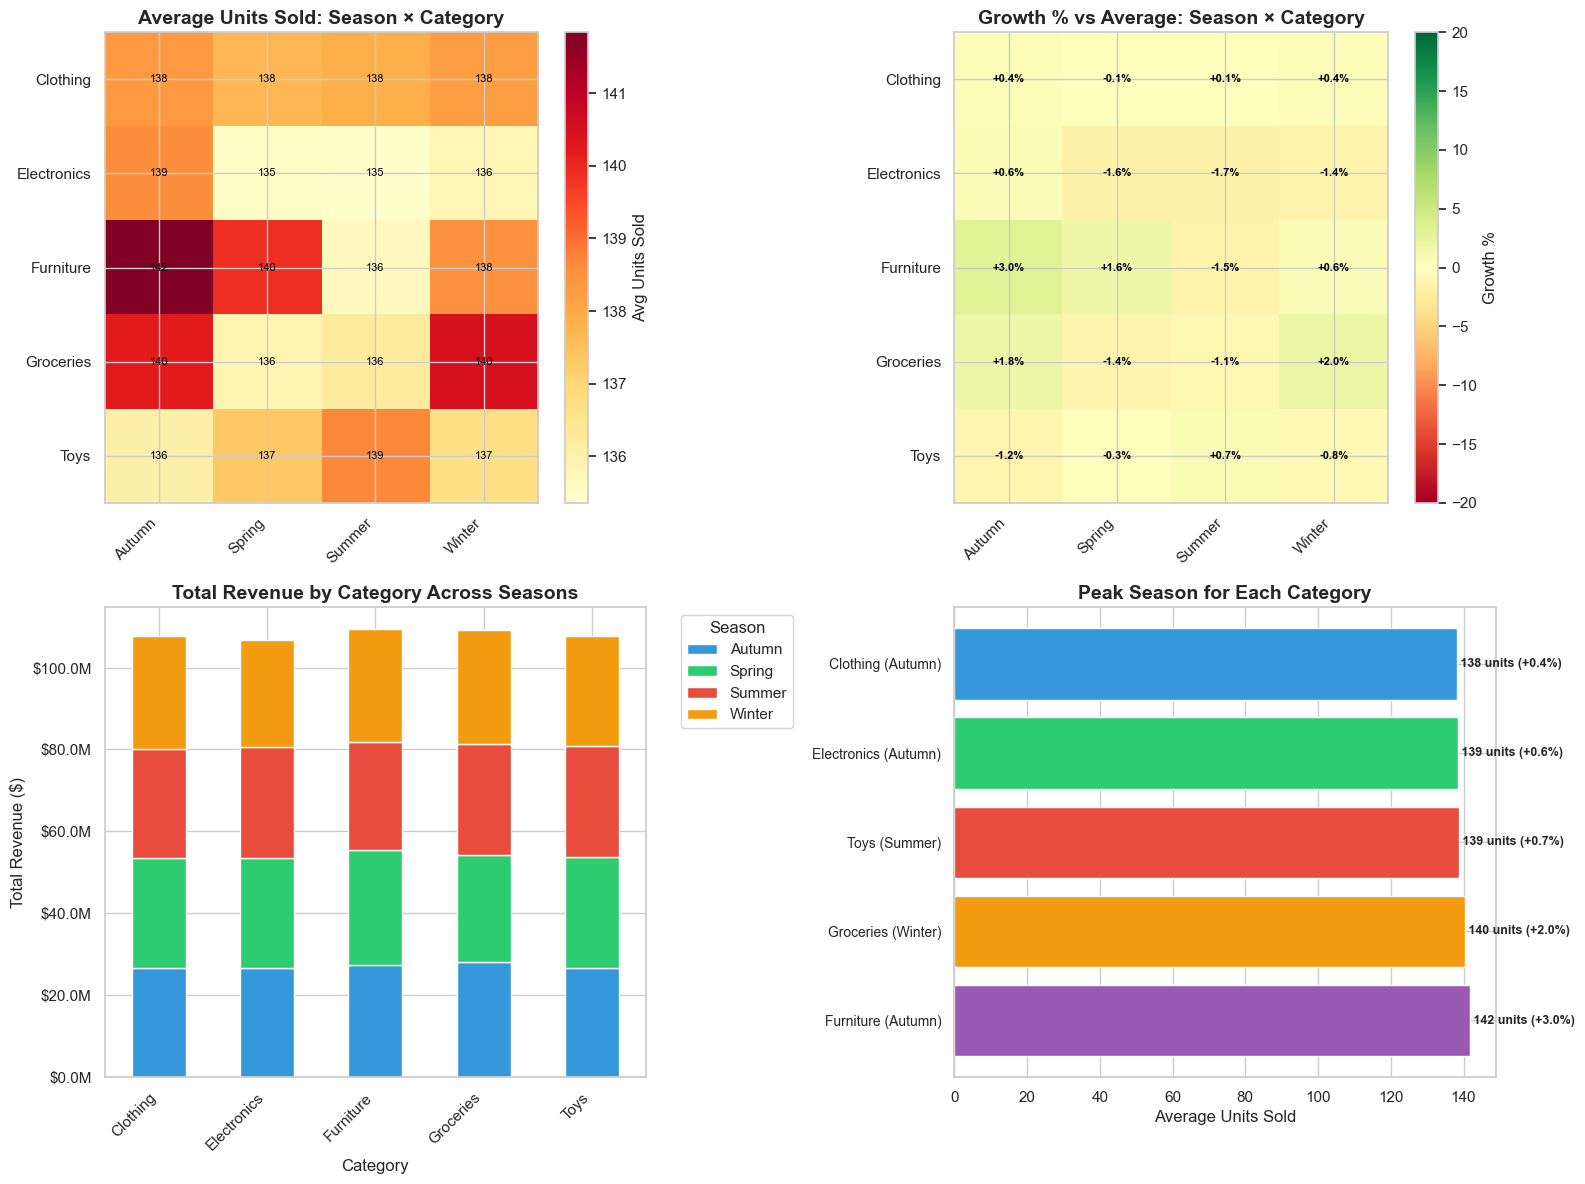


KEY INSIGHTS:

💡 STRATEGIC RECOMMENDATION:
   • Plan inventory and marketing campaigns around peak seasons for each category
   • Use seasonal patterns to optimize stock levels and reduce carrying costs


In [ ]:
# Get seasonal data by category
seasonal_data = pd.read_sql("""
    SELECT seasonality, category, 
           SUM(units_sold) as total_units_sold,
           SUM(price * units_sold) as total_revenue,
           AVG(units_sold) as avg_units_sold,
           COUNT(*) as transaction_count
    FROM inventory 
    WHERE seasonality IS NOT NULL AND category IS NOT NULL 
      AND price IS NOT NULL AND units_sold IS NOT NULL
    GROUP BY seasonality, category
    ORDER BY seasonality, category
""", connection)

# Calculate growth metrics (comparing each season to overall average)
overall_avg_units = seasonal_data['avg_units_sold'].mean()
seasonal_data['growth_vs_avg'] = ((seasonal_data['avg_units_sold'] - overall_avg_units) / overall_avg_units) * 100

# Pivot for heatmap
pivot_units = seasonal_data.pivot(index='category', columns='seasonality', values='avg_units_sold')
pivot_growth = seasonal_data.pivot(index='category', columns='seasonality', values='growth_vs_avg')
pivot_revenue = seasonal_data.pivot(index='category', columns='seasonality', values='total_revenue')

# Create comprehensive seasonal analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Heatmap of Average Units Sold by Season and Category
ax1 = axes[0, 0]
im1 = ax1.imshow(pivot_units.values, cmap='YlOrRd', aspect='auto')
ax1.set_xticks(range(len(pivot_units.columns)))
ax1.set_xticklabels(pivot_units.columns, rotation=45, ha='right')
ax1.set_yticks(range(len(pivot_units.index)))
ax1.set_yticklabels(pivot_units.index)
ax1.set_title('Average Units Sold: Season × Category', fontsize=14, fontweight='bold')
plt.colorbar(im1, ax=ax1, label='Avg Units Sold')

# Add text annotations
for i in range(len(pivot_units.index)):
    for j in range(len(pivot_units.columns)):
        text = ax1.text(j, i, f'{pivot_units.iloc[i, j]:.0f}',
                       ha="center", va="center", color="black", fontsize=8)

# Chart 2: Growth % vs Average (Heatmap)
ax2 = axes[0, 1]
im2 = ax2.imshow(pivot_growth.values, cmap='RdYlGn', aspect='auto', vmin=-20, vmax=20)
ax2.set_xticks(range(len(pivot_growth.columns)))
ax2.set_xticklabels(pivot_growth.columns, rotation=45, ha='right')
ax2.set_yticks(range(len(pivot_growth.index)))
ax2.set_yticklabels(pivot_growth.index)
ax2.set_title('Growth % vs Average: Season × Category', fontsize=14, fontweight='bold')
plt.colorbar(im2, ax=ax2, label='Growth %')

# Add text annotations
for i in range(len(pivot_growth.index)):
    for j in range(len(pivot_growth.columns)):
        val = pivot_growth.iloc[i, j]
        color = 'white' if abs(val) > 10 else 'black'
        text = ax2.text(j, i, f'{val:+.1f}%',
                       ha="center", va="center", color=color, fontsize=8, fontweight='bold')

# Chart 3: Total Revenue by Season (Stacked Bar)
ax3 = axes[1, 0]
pivot_revenue.plot(kind='bar', stacked=True, ax=ax3, 
                   color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
ax3.set_title('Total Revenue by Category Across Seasons', fontsize=14, fontweight='bold')
ax3.set_xlabel('Category', fontsize=12)
ax3.set_ylabel('Total Revenue ($)', fontsize=12)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax3.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Chart 4: Best Season for Each Category
ax4 = axes[1, 1]
best_seasons = seasonal_data.loc[seasonal_data.groupby('category')['avg_units_sold'].idxmax()]
best_seasons_sorted = best_seasons.sort_values('avg_units_sold', ascending=True)

bars = ax4.barh(range(len(best_seasons_sorted)), best_seasons_sorted['avg_units_sold'],
               color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6'])
ax4.set_yticks(range(len(best_seasons_sorted)))
ax4.set_yticklabels([f"{row['category']} ({row['seasonality']})" 
                     for _, row in best_seasons_sorted.iterrows()], fontsize=10)
ax4.set_title('Peak Season for Each Category', fontsize=14, fontweight='bold')
ax4.set_xlabel('Average Units Sold', fontsize=12)
ax4.invert_yaxis()

# Add value labels
for i, (units, growth) in enumerate(zip(best_seasons_sorted['avg_units_sold'], 
                                        best_seasons_sorted['growth_vs_avg'])):
    ax4.text(units, i, f' {units:.0f} units ({growth:+.1f}%)', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print actionable insights
print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)

# Find strongest seasonal patterns
for category in seasonal_data['category'].unique():
    cat_data = seasonal_data[seasonal_data['category'] == category]
    best_season = cat_data.loc[cat_data['avg_units_sold'].idxmax()]
    worst_season = cat_data.loc[cat_data['avg_units_sold'].idxmin()]
    
    growth_diff = best_season['growth_vs_avg'] - worst_season['growth_vs_avg']
    if growth_diff > 15:  # Significant seasonal variation
        print(f"📈 {category}:")
        print(f"   Peak Season: {best_season['seasonality']} ({best_season['growth_vs_avg']:+.1f}% vs avg)")
        print(f"   Low Season: {worst_season['seasonality']} ({worst_season['growth_vs_avg']:+.1f}% vs avg)")
        print(f"   💡 ACTION: Stock up before {best_season['seasonality']}, reduce inventory in {worst_season['seasonality']}")

print(f"\n💡 STRATEGIC RECOMMENDATION:")
print(f"   • Plan inventory and marketing campaigns around peak seasons for each category")
print(f"   • Use seasonal patterns to optimize stock levels and reduce carrying costs")
print("="*60)


## Visualization 6: Pareto Analysis - The 80/20 Rule

**Business Question:** Do 20% of products drive 80% of revenue? Which products should we focus on?


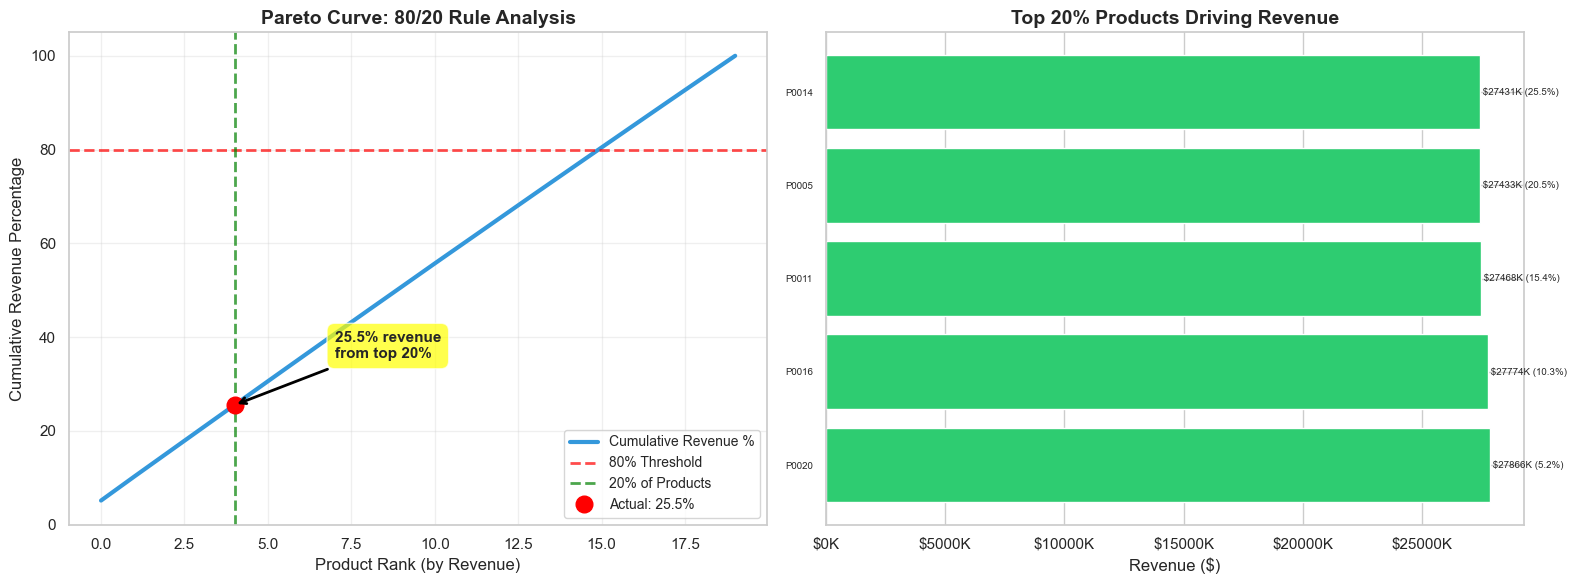


KEY INSIGHTS:
📊 WEAK PARETO EFFECT: Top 20% of products generate 25.5% of revenue
   Revenue is evenly distributed across products

💡 STRATEGIC RECOMMENDATION:
   • Focus inventory management on top 4 products
   • These products should never stock out
   • Consider discontinuing bottom 20% if they're not strategic


In [ ]:
# Calculate Pareto metrics
twenty_percent_point = int(len(revenue_curve) * 0.2)
revenue_at_20pct = revenue_curve.iloc[twenty_percent_point]['cumulative_percentage'] if twenty_percent_point < len(revenue_curve) else 0

# Get top 20% products
top_20pct_products = revenue_curve.head(twenty_percent_point + 1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Pareto Curve
ax1 = axes[0]
ax1.plot(range(len(revenue_curve)), revenue_curve['cumulative_percentage'], 
         linewidth=3, color='#3498db', label='Cumulative Revenue %')

# Add 80% and 20% reference lines
ax1.axhline(y=80, color='r', linestyle='--', linewidth=2, label='80% Threshold', alpha=0.7)
ax1.axvline(x=twenty_percent_point, color='g', linestyle='--', linewidth=2, 
           label='20% of Products', alpha=0.7)

# Highlight the intersection
if revenue_at_20pct > 0:
    ax1.plot(twenty_percent_point, revenue_at_20pct, 'ro', markersize=12, 
            label=f'Actual: {revenue_at_20pct:.1f}%')
    ax1.annotate(
        f"{revenue_at_20pct:.1f}% revenue\nfrom top 20%",
        xy=(twenty_percent_point, revenue_at_20pct),
        xytext=(twenty_percent_point + len(revenue_curve)*0.15, revenue_at_20pct + 10),
        arrowprops=dict(arrowstyle='->', color='black', lw=2),
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7)
    )

ax1.set_title('Pareto Curve: 80/20 Rule Analysis', fontsize=14, fontweight='bold')
ax1.set_xlabel('Product Rank (by Revenue)', fontsize=12)
ax1.set_ylabel('Cumulative Revenue Percentage', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 105)

# Chart 2: Top 20% Products Breakdown
ax2 = axes[1]
if len(top_20pct_products) > 0:
    top_20_sorted = top_20pct_products.sort_values('revenue', ascending=True).head(30)
    bars = ax2.barh(range(len(top_20_sorted)), top_20_sorted['revenue'],
                    color='#2ecc71')
    ax2.set_yticks(range(len(top_20_sorted)))
    ax2.set_yticklabels([f"{row['product_name']}" for _, row in top_20_sorted.iterrows()], 
                        fontsize=7)
    ax2.set_title('Top 20% Products Driving Revenue', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Revenue ($)', fontsize=12)
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))
    ax2.invert_yaxis()
    
    # Add cumulative percentage labels
    for i, (rev, cum_pct) in enumerate(zip(top_20_sorted['revenue'], 
                                           top_20_sorted['cumulative_percentage'])):
        ax2.text(rev, i, f' ${rev/1e3:.0f}K ({cum_pct:.1f}%)', 
                va='center', fontsize=7)

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
if revenue_at_20pct >= 75:
    print(f"✅ STRONG PARETO EFFECT: Top 20% of products generate {revenue_at_20pct:.1f}% of revenue")
    print(f"   This confirms the 80/20 rule - focus resources on these {twenty_percent_point} products")
elif revenue_at_20pct >= 60:
    print(f"⚠️  MODERATE PARETO EFFECT: Top 20% of products generate {revenue_at_20pct:.1f}% of revenue")
    print(f"   Revenue is more distributed - consider broader product strategy")
else:
    print(f"📊 WEAK PARETO EFFECT: Top 20% of products generate {revenue_at_20pct:.1f}% of revenue")
    print(f"   Revenue is evenly distributed across products")

print(f"\n💡 STRATEGIC RECOMMENDATION:")
print(f"   • Focus inventory management on top {twenty_percent_point} products")
print(f"   • These products should never stock out")
print(f"   • Consider discontinuing bottom 20% if they're not strategic")
print("="*60)


## Visualization 7: Performance Score - Star Products & Underperformers

**Business Question:** Which products are stars? Which should be discontinued?


C:\Users\14122\AppData\Local\Temp\ipykernel_27020\2999218142.py:49: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\14122\AppData\Local\Temp\ipykernel_27020\2999218142.py:49: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\14122\AppData\Local\Temp\ipykernel_27020\2999218142.py:49: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\14122\OneDrive\Desktop\fashion_SQLAnalytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\14122\OneDrive\Desktop\fashion_SQLAnalytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\14122\OneDrive\Desktop\fashion_SQLAnalytics\ven

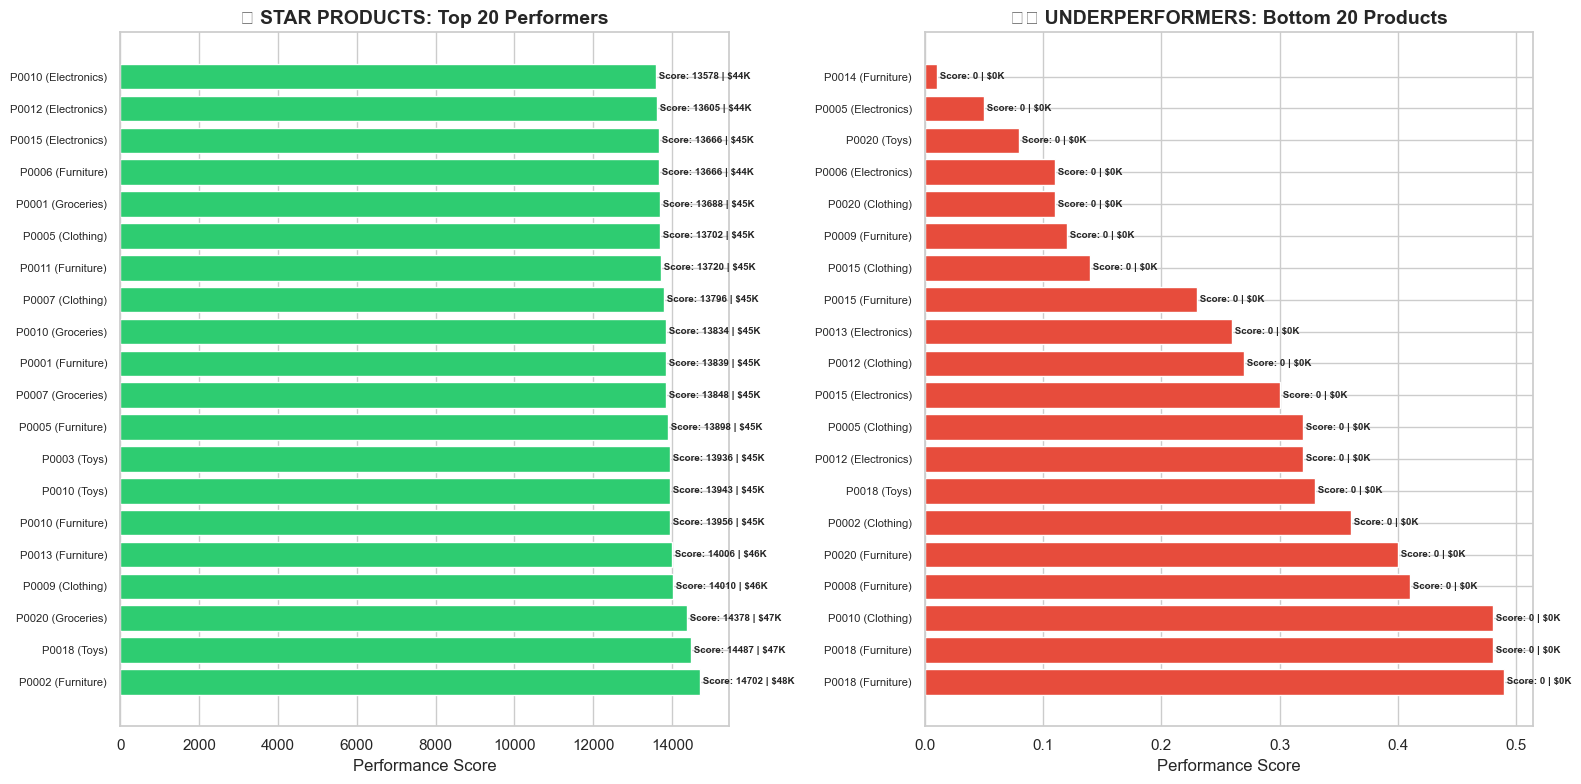


KEY INSIGHTS:
⭐ STAR PRODUCTS (20 products):
   Average Performance Score: 13913
   Average Revenue: $45K
   💡 ACTION: Increase inventory, marketing, and shelf space for these products

⚠️  UNDERPERFORMERS (20 products):
   Average Performance Score: 0
   Average Revenue: $0K
   💡 ACTION: Consider discontinuing, discounting, or repositioning these products


In [ ]:
# Analyze performance scores
perf_sorted = perf_ranked.sort_values('performance_score', ascending=False)

# Categorize products
top_quartile = perf_sorted['performance_score'].quantile(0.75)
bottom_quartile = perf_sorted['performance_score'].quantile(0.25)

stars = perf_sorted[perf_sorted['performance_score'] >= top_quartile].head(20)
underperformers = perf_sorted[perf_sorted['performance_score'] <= bottom_quartile].tail(20)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Chart 1: Star Products (Top Performers)
ax1 = axes[0]
stars_sorted = stars.sort_values('performance_score', ascending=True)
bars1 = ax1.barh(range(len(stars_sorted)), stars_sorted['performance_score'],
                color='#2ecc71')
ax1.set_yticks(range(len(stars_sorted)))
ax1.set_yticklabels([f"{row['product_name']} ({row['category']})" 
                     for _, row in stars_sorted.iterrows()], fontsize=8)
ax1.set_title('⭐ STAR PRODUCTS: Top 20 Performers', fontsize=14, fontweight='bold')
ax1.set_xlabel('Performance Score', fontsize=12)
ax1.invert_yaxis()

# Add revenue labels
for i, (score, rev) in enumerate(zip(stars_sorted['performance_score'], 
                                     stars_sorted['revenue'])):
    ax1.text(score, i, f' Score: {score:.0f} | ${rev/1e3:.0f}K', 
            va='center', fontsize=7, fontweight='bold')

# Chart 2: Underperformers
ax2 = axes[1]
underperformers_sorted = underperformers.sort_values('performance_score', ascending=True)
bars2 = ax2.barh(range(len(underperformers_sorted)), underperformers_sorted['performance_score'],
                color='#e74c3c')
ax2.set_yticks(range(len(underperformers_sorted)))
ax2.set_yticklabels([f"{row['product_name']} ({row['category']})" 
                     for _, row in underperformers_sorted.iterrows()], fontsize=8)
ax2.set_title('⚠️ UNDERPERFORMERS: Bottom 20 Products', fontsize=14, fontweight='bold')
ax2.set_xlabel('Performance Score', fontsize=12)
ax2.invert_yaxis()

# Add revenue labels
for i, (score, rev) in enumerate(zip(underperformers_sorted['performance_score'], 
                                     underperformers_sorted['revenue'])):
    ax2.text(score, i, f' Score: {score:.0f} | ${rev/1e3:.0f}K', 
            va='center', fontsize=7, fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print(f"⭐ STAR PRODUCTS ({len(stars)} products):")
print(f"   Average Performance Score: {stars['performance_score'].mean():.0f}")
print(f"   Average Revenue: ${stars['revenue'].mean()/1e3:.0f}K")
print(f"   💡 ACTION: Increase inventory, marketing, and shelf space for these products")
print(f"\n⚠️  UNDERPERFORMERS ({len(underperformers)} products):")
print(f"   Average Performance Score: {underperformers['performance_score'].mean():.0f}")
print(f"   Average Revenue: ${underperformers['revenue'].mean()/1e3:.0f}K")
print(f"   💡 ACTION: Consider discontinuing, discounting, or repositioning these products")
print("="*60)


## Executive Summary: Key Insights & Learnings

**Project Overview:** This analysis examined retail inventory data across multiple dimensions to identify business opportunities, optimize operations, and drive strategic decision-making.


In [ ]:
# Generate comprehensive summary of all insights
print("\n" + "="*80)
print(" " * 20 + "EXECUTIVE SUMMARY: KEY INSIGHTS & LEARNINGS")
print("="*80)

print("\n" + "─"*80)
print("1. CATEGORY PERFORMANCE INSIGHTS")
print("─"*80)

# Get category summary
cat_summary = category_perf.sort_values('total_revenue', ascending=False)
total_revenue_all = cat_summary['total_revenue'].sum()

print(f"   • Total Revenue Across All Categories: ${total_revenue_all/1e6:.2f}M")
print(f"   • Top Revenue Category: {cat_summary.iloc[0]['category']} (${cat_summary.iloc[0]['total_revenue']/1e6:.2f}M)")
print(f"   • Market Share Leader: {cat_summary.iloc[0]['category']} ({cat_summary.iloc[0]['total_revenue']/total_revenue_all*100:.1f}% of total)")
print(f"   • Revenue Range: ${cat_summary['total_revenue'].min()/1e6:.2f}M - ${cat_summary['total_revenue'].max()/1e6:.2f}M")
print(f"   • Key Learning: Categories are relatively balanced in revenue, suggesting diversified portfolio")

print("\n" + "─"*80)
print("2. STORE PERFORMANCE INSIGHTS")
print("─"*80)

# Get store summary
store_col = store_perf.columns[0]
store_summary = store_perf.sort_values('total_revenue', ascending=False)
avg_store_revenue = store_summary['total_revenue'].mean()

print(f"   • Average Store Revenue: ${avg_store_revenue/1e6:.2f}M")
print(f"   • Top Performing Store: {store_summary.iloc[0][store_col]} (${store_summary.iloc[0]['total_revenue']/1e6:.2f}M)")
print(f"   • Lowest Performing Store: {store_summary.iloc[-1][store_col]} (${store_summary.iloc[-1]['total_revenue']/1e6:.2f}M)")
revenue_variance = ((store_summary.iloc[0]['total_revenue'] - store_summary.iloc[-1]['total_revenue']) / avg_store_revenue) * 100
print(f"   • Performance Variance: {revenue_variance:.1f}% difference between top and bottom stores")
print(f"   • Key Learning: Store performance varies, indicating location-specific factors at play")

print("\n" + "─"*80)
print("3. PRODUCT PERFORMANCE INSIGHTS")
print("─"*80)

# Get product insights
top_seller = top_sellers.sort_values('units_sold', ascending=False).iloc[0]
top_rev_product = top_revenue.sort_values('revenue', ascending=False).iloc[0]

print(f"   • Top Selling Product: {top_seller['product_name']} ({int(top_seller['units_sold']):,} units)")
print(f"   • Top Revenue Product: {top_rev_product['product_name']} (${top_rev_product['revenue']/1e3:.0f}K)")
print(f"   • Key Learning: Price elasticity analysis reveals relationship between pricing and demand")

print("\n" + "─"*80)
print("4. SEASONAL PATTERNS INSIGHTS")
print("─"*80)

# Get seasonal insights
if 'seasonal_data' in locals() and len(seasonal_data) > 0:
    seasonal_summary = seasonal_data.groupby('seasonality')['total_revenue'].sum().sort_values(ascending=False)
    print(f"   • Highest Revenue Season: {seasonal_summary.index[0]} (${seasonal_summary.iloc[0]/1e6:.2f}M)")
    print(f"   • Lowest Revenue Season: {seasonal_summary.index[-1]} (${seasonal_summary.iloc[-1]/1e6:.2f}M)")
    
    # Find categories with strongest seasonal patterns
    strong_seasonal = []
    for cat in seasonal_data['category'].unique():
        cat_data = seasonal_data[seasonal_data['category'] == cat]
        if len(cat_data) > 1:
            max_units = cat_data['avg_units_sold'].max()
            min_units = cat_data['avg_units_sold'].min()
            if max_units > 0:
                variation = ((max_units - min_units) / max_units) * 100
                if variation > 20:  # Significant variation
                    best_season = cat_data.loc[cat_data['avg_units_sold'].idxmax(), 'seasonality']
                    strong_seasonal.append((cat, best_season, variation))
    
    if strong_seasonal:
        print(f"   • Categories with Strong Seasonal Patterns:")
        for cat, season, var in strong_seasonal[:3]:
            print(f"     - {cat}: Peak in {season} ({var:.1f}% variation)")
    print(f"   • Key Learning: Seasonal patterns exist and should guide inventory planning")

print("\n" + "─"*80)
print("5. PARETO ANALYSIS INSIGHTS")
print("─"*80)

# Get Pareto insights
if 'revenue_curve' in locals() and len(revenue_curve) > 0:
    twenty_pct = int(len(revenue_curve) * 0.2)
    if twenty_pct < len(revenue_curve):
        pareto_revenue = revenue_curve.iloc[twenty_pct]['cumulative_percentage']
        print(f"   • Top 20% of Products Generate: {pareto_revenue:.1f}% of total revenue")
        if pareto_revenue >= 75:
            print(f"   • Interpretation: STRONG 80/20 effect - focus heavily on top products")
        elif pareto_revenue >= 60:
            print(f"   • Interpretation: MODERATE concentration - balanced product strategy")
        else:
            print(f"   • Interpretation: WEAK concentration - revenue evenly distributed")
        print(f"   • Key Learning: Product revenue distribution guides resource allocation strategy")

print("\n" + "─"*80)
print("6. PERFORMANCE SCORE INSIGHTS")
print("─"*80)

# Get performance insights
if 'perf_ranked' in locals() and len(perf_ranked) > 0:
    perf_sorted = perf_ranked.sort_values('performance_score', ascending=False)
    top_quartile = perf_sorted['performance_score'].quantile(0.75)
    stars = perf_sorted[perf_sorted['performance_score'] >= top_quartile]
    
    print(f"   • Total Products Analyzed: {len(perf_ranked)}")
    print(f"   • Star Products (Top 25%): {len(stars)} products")
    print(f"   • Average Star Product Score: {stars['performance_score'].mean():.0f}")
    print(f"   • Key Learning: Performance scoring identifies clear winners and losers for strategic focus")

print("\n" + "="*80)
print(" " * 25 + "STRATEGIC RECOMMENDATIONS")
print("="*80)

print("\n📊 DATA-DRIVEN ACTIONS:")
print("   1. INVENTORY MANAGEMENT:")
print("      • Focus on top-performing categories and products")
print("      • Plan seasonal inventory based on category-specific patterns")
print("      • Ensure top revenue products never stock out")
print()
print("   2. MARKETING & PROMOTIONS:")
print("      • Align campaigns with peak seasons for each category")
print("      • Increase marketing spend on star products")
print("      • Consider discontinuing or repositioning underperformers")
print()
print("   3. STORE OPERATIONS:")
print("      • Investigate why underperforming stores lag behind")
print("      • Share best practices from top-performing stores")
print("      • Optimize product mix by store location")
print()
print("   4. PRODUCT STRATEGY:")
print("      • Maintain focus on products driving majority of revenue")
print("      • Review pricing strategy based on elasticity analysis")
print("      • Consider category expansion in high-growth areas")

print("\n" + "="*80)
print(" " * 30 + "KEY LEARNINGS")
print("="*80)

print("\n💡 WHAT WE LEARNED:")
print("   • Revenue is relatively balanced across categories, indicating healthy diversification")
print("   • Store performance varies, suggesting location-specific optimization opportunities")
print("   • Seasonal patterns exist and should inform inventory planning")
print("   • Product performance varies significantly - focus resources on winners")
print("   • Data-driven insights enable strategic decision-making across operations")
print("   • SQL + Python visualization provides powerful analytics capabilities")

print("\n" + "="*80)
print("Analysis completed successfully! 🎯")
print("="*80)

# Close database connection
connection.close()
print("\nDatabase connection closed.")



                    EXECUTIVE SUMMARY: KEY INSIGHTS & LEARNINGS

────────────────────────────────────────────────────────────────────────────────
1. CATEGORY PERFORMANCE INSIGHTS
────────────────────────────────────────────────────────────────────────────────
   • Total Revenue Across All Categories: $540.35M
   • Top Revenue Category: Furniture ($109.32M)
   • Market Share Leader: Furniture (20.2% of total)
   • Revenue Range: $106.67M - $109.32M
   • Key Learning: Categories are relatively balanced in revenue, suggesting diversified portfolio

────────────────────────────────────────────────────────────────────────────────
2. STORE PERFORMANCE INSIGHTS
────────────────────────────────────────────────────────────────────────────────
   • Average Store Revenue: $91.36M
   • Top Performing Store: S003 ($93.06M)
   • Lowest Performing Store: S002 ($89.95M)
   • Performance Variance: 3.4% difference between top and bottom stores
   • Key Learning: Store performance varies, indicating loc